In [233]:
from PIL import Image
from PIL import ImageOps    
import torchvision.transforms as T
import torch

# Data

## Handdrawn

In [248]:
A = Image.open("data/test_imgs/A.jpg")
B = Image.open("data/test_imgs/B.jpg")
v = Image.open("data/test_imgs/v.jpg")
c = Image.open("data/test_imgs/c.jpg")

hand_imgs =  [A, B ,v, c]

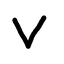

In [296]:
transforms = T.Compose([
#     T.Lambda(lambda x: ImageOps.invert(x)),
    T.Resize((64,64), interpolation=1),
    T.ToTensor(),
#     T.Lambda(lambda x: x.mean(0, keepdim=True))
])

x = torch.stack([transforms(i) for i in hand_imgs])
y = ["A","B","v","c"]

T.ToPILImage()(x[2])

In [307]:
x.shape

torch.Size([4, 3, 64, 64])

## Generated

In [286]:
from generator import fonts, Generator
import string
chars = list(string.ascii_letters)
generator = Generator(chars, fonts)

In [287]:
imgs, y = generator.sample(10)
x = torch.stack([transforms(i) for i in imgs])

# Model

In [313]:
import torch
from models import create_model

In [314]:
model = create_model(3, 52)

In [315]:
state_dict = torch.load("checkpoints/best_model.pth")

In [316]:
model.load_state_dict(state_dict)

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [317]:
with torch.no_grad():
    y_hat = model(x)

In [318]:
idx2char = {i:char for i,char in enumerate(string.ascii_letters)}

In [319]:
[idx2char[int(k)] for k in y_hat.argmax(1) ]

['L', 'Y', 'w', 'K']

In [320]:
y

['A', 'B', 'v', 'c']